In [27]:
import numpy as np; import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
import time
from sklearn import svm

plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.01, x.max() + 0.01
    y_min, y_max = y.min() - 0.01, y.max() + 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



filename = 'freshest_hops.csv' # designate filename
rawdf = pd.read_table(filename, error_bad_lines=False, delimiter = ',') #read in file
print(rawdf)

        time    mq2    mq3    mq4    mq5    mq7  day  hop  alpha  beta
0     1155.2  0.900  1.630  0.625  0.350  1.135    4    1   12.3   3.6
1     1156.0  0.900  1.635  0.620  0.355  1.135    4    1   12.3   3.6
2     1156.8  0.900  1.640  0.620  0.355  1.135    4    1   12.3   3.6
3     1157.6  0.900  1.640  0.625  0.345  1.135    4    1   12.3   3.6
4     1158.4  0.905  1.630  0.615  0.340  1.135    4    1   12.3   3.6
5     1159.2  0.900  1.630  0.615  0.335  1.135    4    1   12.3   3.6
6     1160.0  0.905  1.635  0.625  0.340  1.135    4    1   12.3   3.6
7     1160.8  0.905  1.640  0.625  0.345  1.135    4    1   12.3   3.6
8     1161.6  0.905  1.635  0.620  0.340  1.135    4    1   12.3   3.6
9     1162.4  0.910  1.640  0.625  0.345  1.135    4    1   12.3   3.6
10    1163.3  0.905  1.635  0.625  0.345  1.135    4    1   12.3   3.6
11    1164.1  0.910  1.630  0.610  0.345  1.130    4    1   12.3   3.6
12    1164.9  0.910  1.635  0.625  0.345  1.125    4    1   12.3   3.6
13    

0.934074074074
0.888888888889
0.935555555556
0.91037037037


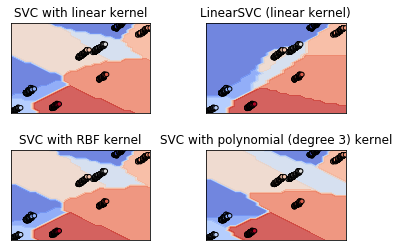

In [28]:
# identify classes and input matrix
labels = np.array(rawdf['hop']) #set classes as labels
#df = rawdf.drop('hop', 1) #remove class numbers from data matrix

df = rawdf.filter(['mq2', 'mq7'], axis=1)
sensordata = df.values #matrix of sensor data

#set K values to scan through
neighbor_try = np.arange(1,250)
h = .01  # step size in the mesh

X = sensordata
y = labels

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#    ax.set_xlabel('Sepal length')
#    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    print(clf.score(X,y))
plt.show()

In [25]:
X

array([[ 0.9  ,  1.135],
       [ 0.9  ,  1.135],
       [ 0.9  ,  1.135],
       ..., 
       [ 0.675,  0.53 ],
       [ 0.675,  0.525],
       [ 0.68 ,  0.53 ]])

In [19]:
X1

array([ 1.135,  1.135,  1.135, ...,  0.53 ,  0.525,  0.53 ])